In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the Excel

In [5]:
# Load the dataset
#df = pd.read_excel("Models\IWA_new.xlsx", sheet_name='Final Raw Sample(0%)')
df = pd.read_csv("Sales_no_outliers.csv")
df = df.drop("Industry (Exiobase)", axis=1)
df.head()

,Unnamed: 0,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Revenue,Operating Income,Total Environmental Cost,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
0,0,2019,SAGA PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Multi-line Insurance,-0.028872,-0.130254,1.102887e+09,244464000.0,-3.184231e+07,...,-170775.886453,-1059.042606,-4.739468,-1.027193,-3584.970569,-5.649112,70.667599,70.667599,-1297.277948,0.006135
1,1,2019,BURSA MALAYSIA BHD,MALAYSIA,Financial Exchanges & Data,-0.016772,-0.034656,1.173640e+08,56797000.0,-1.968379e+06,...,-11502.243880,-168.146428,-1.410813,-1.207108,-222.196310,-1.681590,10.138780,10.138780,-79.398691,0.043215
2,2,2019,INTERTEK GROUP PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Research & Consulting Services,-0.015297,-0.094878,3.961539e+09,638704000.0,-6.059927e+07,...,-324959.759255,-3804.051175,-17.024036,-3.689647,-6861.392776,-20.291452,253.836024,253.836024,-2470.054721,0.011467
3,4,2019,BUREAU VERITAS SA,FRANCE,Research & Consulting Services,-0.006993,-0.050957,5.717172e+09,784560000.0,-3.997865e+07,...,-214438.078273,-4116.308632,-37.818819,-9.136488,-4606.916825,-45.077368,586.030400,586.030400,-1632.997165,0.033005
4,5,2019,RICARDO PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Research & Consulting Services,-0.006657,-0.072749,4.878190e+08,44636000.0,-3.247235e+06,...,-17406.471405,-468.426144,-2.096319,-0.454339,-373.412363,-2.498664,31.257053,31.257053,-132.536045,0.025666


# Filter for only the Brewery Category with more than 10 datapoints

In [6]:
brewery_df = df[df['GICS Sub-Industry'] == 'Brewers']
# Group the data by "Company Name" and count unique years for each group
company_years_count = brewery_df.groupby("Company Name")["Year"].nunique()

# Filter companies with at least 10 years of data
filtered_companies = company_years_count[company_years_count >= 8].index

# Create a new DataFrame with only the companies that meet the criteria
filtered_df = brewery_df[brewery_df["Company Name"].isin(filtered_companies)]
#filtered_df.shape
filtered_df

,Unnamed: 0,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Revenue,Operating Income,Total Environmental Cost,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
484,517,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.065962,-0.465228,1.057940e+10,1.500000e+09,-6.978419e+08,...,-3.977745e+08,-77571.792798,-1113.208360,-326.988191,-37024.568588,-1326.865949,15176.840942,15176.840942,-12261.768244,0.059202
490,523,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Brewers,-0.033887,-0.114930,5.248464e+10,1.547524e+10,-1.778566e+09,...,-1.909141e+08,-222519.248882,-3914.291085,-325.789140,-190769.424529,-4665.559245,56659.806086,56659.806086,-64862.799133,0.080199
493,526,2019,CARLSBERG A/S,DENMARK,Brewers,-0.024146,-0.160548,9.890572e+09,1.487489e+09,-2.388141e+08,...,-3.902679e+07,-366663.271634,-1480.449400,-288.844325,-27951.868900,-1764.591400,19253.589023,19132.282417,-8148.334758,0.029599
497,530,2019,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.018988,-0.124194,2.687117e+10,4.108276e+09,-5.102237e+08,...,-6.984576e+07,-198189.995171,-1458.522182,-168.769751,-54528.158099,-1738.455701,20656.408130,20656.408130,-18050.980779,0.093336
499,532,2019,HEINEKEN NV,NETHERLANDS,Brewers,-0.017098,-0.105084,2.687117e+10,4.372284e+09,-4.594560e+08,...,-1.876383e+07,-198189.995171,-1458.522182,-168.769751,-54563.490099,-1738.455701,20656.408130,20656.408130,-18063.841679,0.101854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12498,13368,2010,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.030260,-0.235039,2.164753e+10,2.786953e+09,-6.550440e+08,...,-1.268475e+08,-165536.025577,-2301.994560,-140.963088,-76384.211659,-2743.815360,33270.073871,33270.073871,-22119.416745,0.151424
12500,13370,2010,HEINEKEN NV,NETHERLANDS,Brewers,-0.026705,-0.207432,2.164753e+10,2.786953e+09,-5.781028e+08,...,-4.990628e+07,-165536.025577,-2301.994560,-140.963088,-76384.211659,-2743.815360,33270.073871,33270.073871,-22119.416745,0.008737
12501,13371,2010,CARLSBERG A/S,DENMARK,Brewers,-0.023217,-0.149215,1.081400e+10,1.682586e+09,-2.510669e+08,...,-4.237946e+07,-390154.909705,-3229.881860,-307.350204,-43668.262875,-3849.791660,44939.983297,44810.904736,-9029.590738,0.020611
12503,13373,2010,KIRIN HOLDINGS CO LTD,JAPAN,Brewers,-0.019710,-0.283115,2.685426e+10,1.869512e+09,-5.292861e+08,...,-1.709025e+07,-37042.309634,-568.200650,-107.606420,-59377.364941,-677.255150,7619.713272,7619.713272,-20952.815851,0.006961


# Try visualization with Boxplots



## Absolute Values

c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


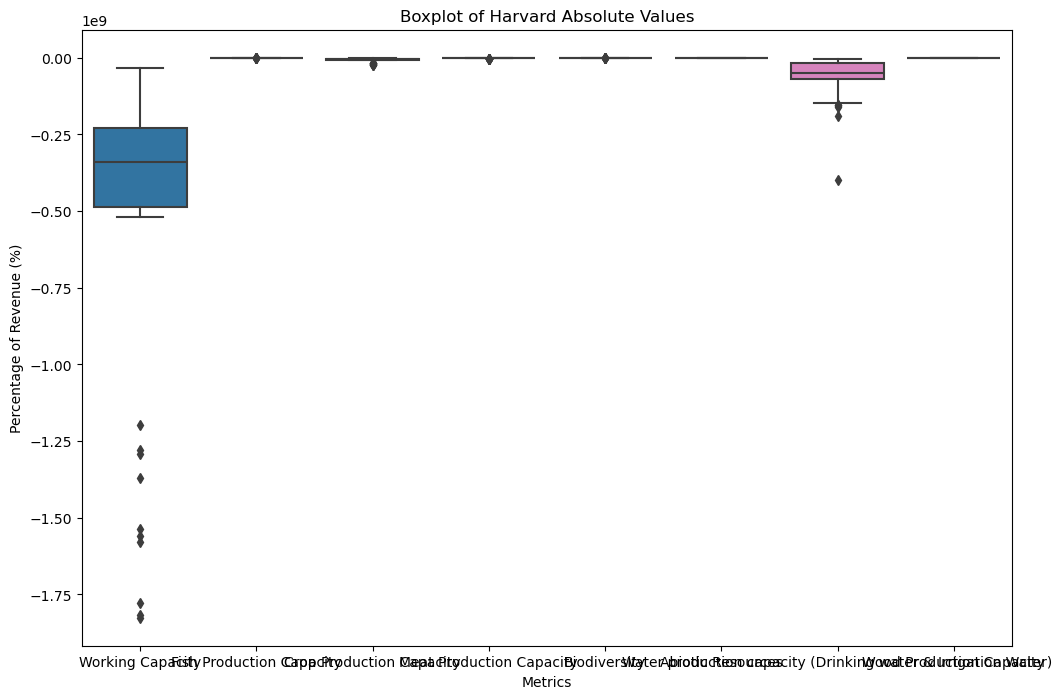

In [7]:
df_abs_box = filtered_df.melt(id_vars='GICS Sub-Industry', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_abs_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Revenue (%)')
plt.title('Boxplot of Harvard Absolute Values')
plt.show()

In [8]:
df_abs_box

,GICS Sub-Industry,variable,value
0,Brewers,Working Capacity,-2.950986e+08
1,Brewers,Working Capacity,-1.561186e+09
2,Brewers,Working Capacity,-1.962082e+08
3,Brewers,Working Capacity,-4.329371e+08
4,Brewers,Working Capacity,-4.332461e+08
...,...,...,...
555,Brewers,Wood Production Capacity,6.654015e+04
556,Brewers,Wood Production Capacity,6.654015e+04
557,Brewers,Wood Production Capacity,8.987997e+04
558,Brewers,Wood Production Capacity,1.523943e+04


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


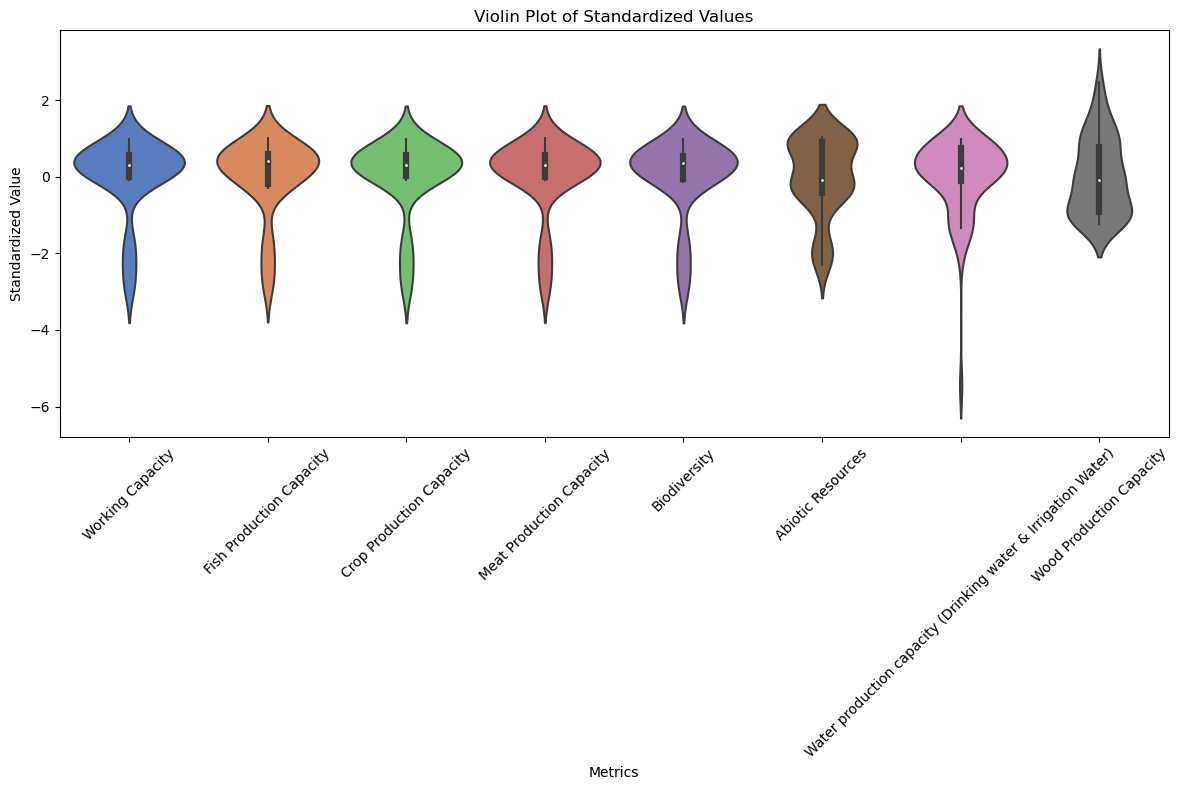

In [9]:
df_abs_box['std_value'] = df_abs_box.groupby('variable')['value'].transform(lambda x: (x - x.mean()) / x.std())

# Create the violin plot with standardized values
plt.figure(figsize=(12, 8))
sns.violinplot(x='variable', y='std_value', data=df_abs_box, palette="muted")
plt.xlabel('Metrics')
plt.ylabel('Standardized Value')
plt.title('Violin Plot of Standardized Values')
plt.xticks(rotation=45)  # Rotate x labels for better readability if they are lengthy
plt.tight_layout()  # Ensures that all labels fit well in the plot area
plt.show()

## On Percentage of Revenue

In [15]:
df_rev = filtered_df.copy()
for column in df_rev.loc[:,"Working Capacity":"SDG 15.5"]:
    #print(column)
    df_rev[column] = (df_rev[column] / df_rev['Revenue'])*100
df_rev.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Revenue,Operating Income,Total Environmental Cost,Working Capacity,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
517,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.065962,-0.465228,1.057940e+10,1.500000e+09,-6.978419e+08,-2.789370,...,-3.759897,-0.000733,-0.000011,-3.090801e-06,-0.000350,-0.000013,0.000143,0.000143,-0.000116,0.059202
523,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Brewers,-0.033887,-0.114930,5.248464e+10,1.547524e+10,-1.778566e+09,-2.974557,...,-0.363752,-0.000424,-0.000007,-6.207324e-07,-0.000363,-0.000009,0.000108,0.000108,-0.000124,0.080199
526,2019,CARLSBERG A/S,DENMARK,Brewers,-0.024146,-0.160548,9.890572e+09,1.487489e+09,-2.388141e+08,-1.983790,...,-0.394586,-0.003707,-0.000015,-2.920401e-06,-0.000283,-0.000018,0.000195,0.000193,-0.000082,0.029599
530,2019,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.018988,-0.124194,2.687117e+10,4.108276e+09,-5.102237e+08,-1.611158,...,-0.259928,-0.000738,-0.000005,-6.280700e-07,-0.000203,-0.000006,0.000077,0.000077,-0.000067,0.093336
532,2019,HEINEKEN NV,NETHERLANDS,Brewers,-0.017098,-0.105084,2.687117e+10,4.372284e+09,-4.594560e+08,-1.612308,...,-0.069829,-0.000738,-0.000005,-6.280700e-07,-0.000203,-0.000006,0.000077,0.000077,-0.000067,0.101854


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


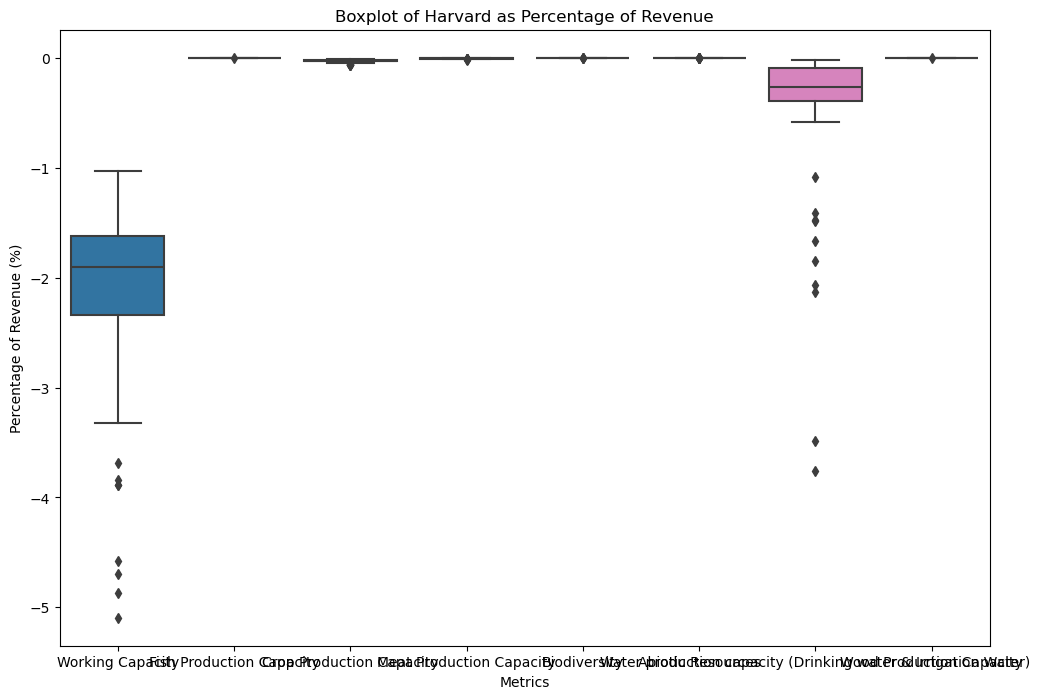

In [16]:
df_rev_box = df_rev.melt(id_vars='GICS Sub-Industry', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_rev_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Revenue (%)')
plt.title('Boxplot of Harvard as Percentage of Revenue')
plt.show()

c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


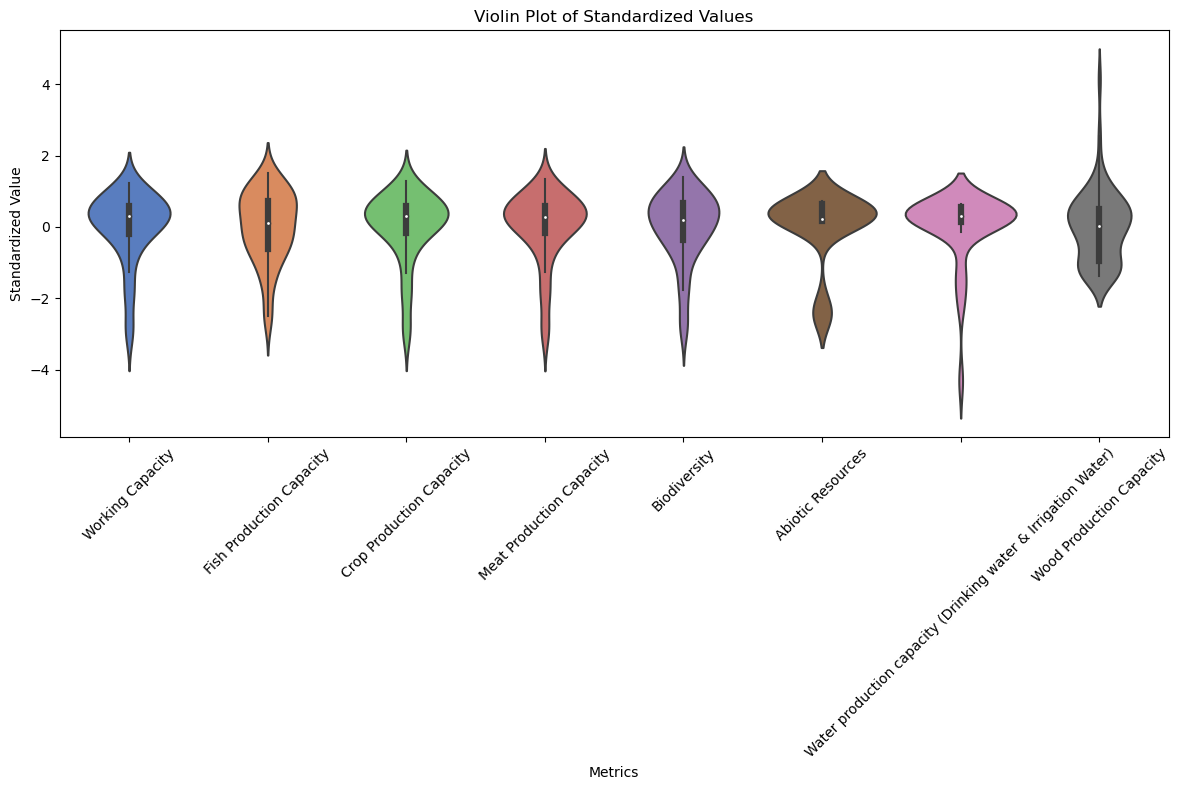

In [17]:
df_rev_box['std_value'] = df_rev_box.groupby('variable')['value'].transform(lambda x: (x - x.mean()) / x.std())

# Create the violin plot with standardized values
plt.figure(figsize=(12, 8))
sns.violinplot(x='variable', y='std_value', data=df_rev_box, palette="muted")
plt.xlabel('Metrics')
plt.ylabel('Standardized Value')
plt.title('Violin Plot of Standardized Values')
plt.xticks(rotation=45)  # Rotate x labels for better readability if they are lengthy
plt.tight_layout()  # Ensures that all labels fit well in the plot area
plt.show()

In [18]:
df_rev_box

,GICS Sub-Industry,variable,value,std_value
0,Brewers,Working Capacity,-2.789370,-0.670091
1,Brewers,Working Capacity,-2.974557,-0.870877
2,Brewers,Working Capacity,-1.983790,0.203346
3,Brewers,Working Capacity,-1.611158,0.607367
4,Brewers,Working Capacity,-1.612308,0.606120
...,...,...,...,...
555,Brewers,Wood Production Capacity,0.000307,0.647402
556,Brewers,Wood Production Capacity,0.000307,0.647402
557,Brewers,Wood Production Capacity,0.000831,4.134059
558,Brewers,Wood Production Capacity,0.000057,-1.021030


## On Percentage of Op Income

In [19]:
df_opinc = filtered_df.copy()
for column in df_opinc.loc[:,"Working Capacity":"SDG 15.5"]:
    #print(column)
    df_opinc[column] = (df_opinc[column] / df_opinc['Operating Income'])*100
df_opinc.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Revenue,Operating Income,Total Environmental Cost,Working Capacity,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
517,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.065962,-0.465228,1.057940e+10,1.500000e+09,-6.978419e+08,-19.673242,...,-26.518301,-0.005171,-0.000074,-0.000022,-0.002468,-0.000088,0.001012,0.001012,-0.000817,0.059202
523,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Brewers,-0.033887,-0.114930,5.248464e+10,1.547524e+10,-1.778566e+09,-10.088280,...,-1.233675,-0.001438,-0.000025,-0.000002,-0.001233,-0.000030,0.000366,0.000366,-0.000419,0.080199
526,2019,CARLSBERG A/S,DENMARK,Brewers,-0.024146,-0.160548,9.890572e+09,1.487489e+09,-2.388141e+08,-13.190567,...,-2.623669,-0.024650,-0.000100,-0.000019,-0.001879,-0.000119,0.001294,0.001286,-0.000548,0.029599
530,2019,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.018988,-0.124194,2.687117e+10,4.108276e+09,-5.102237e+08,-10.538169,...,-1.700123,-0.004824,-0.000036,-0.000004,-0.001327,-0.000042,0.000503,0.000503,-0.000439,0.093336
532,2019,HEINEKEN NV,NETHERLANDS,Brewers,-0.017098,-0.105084,2.687117e+10,4.372284e+09,-4.594560e+08,-9.908918,...,-0.429154,-0.004533,-0.000033,-0.000004,-0.001248,-0.000040,0.000472,0.000472,-0.000413,0.101854


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


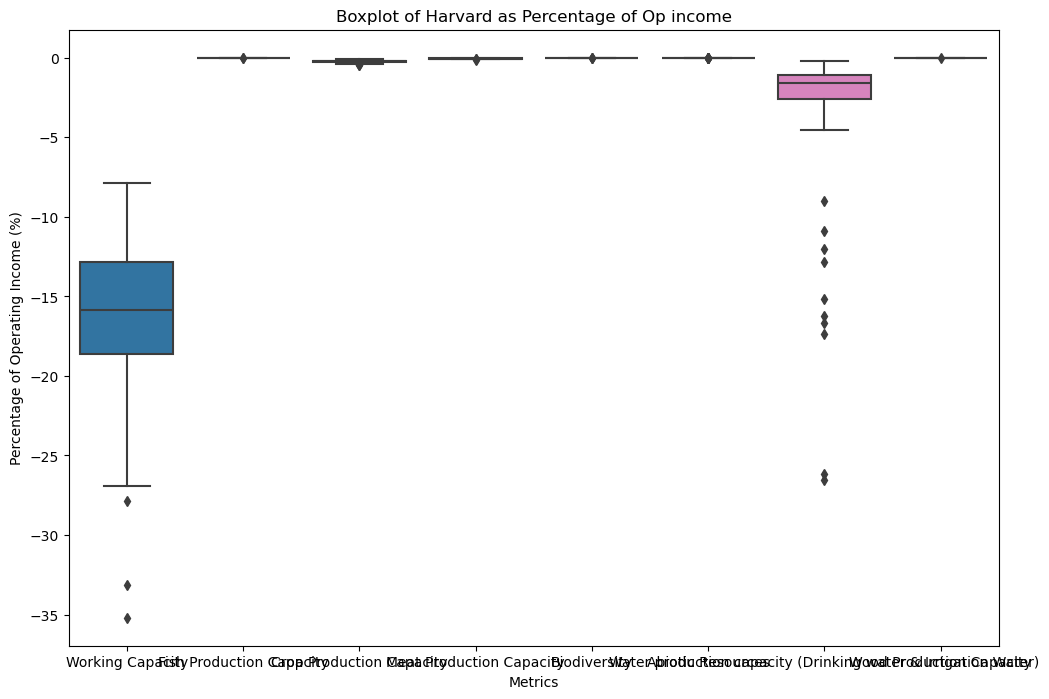

In [20]:
df_opinc_box = df_opinc.melt(id_vars='GICS Sub-Industry', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_opinc_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Operating Income (%)')
plt.title('Boxplot of Harvard as Percentage of Op income')
plt.show()

c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


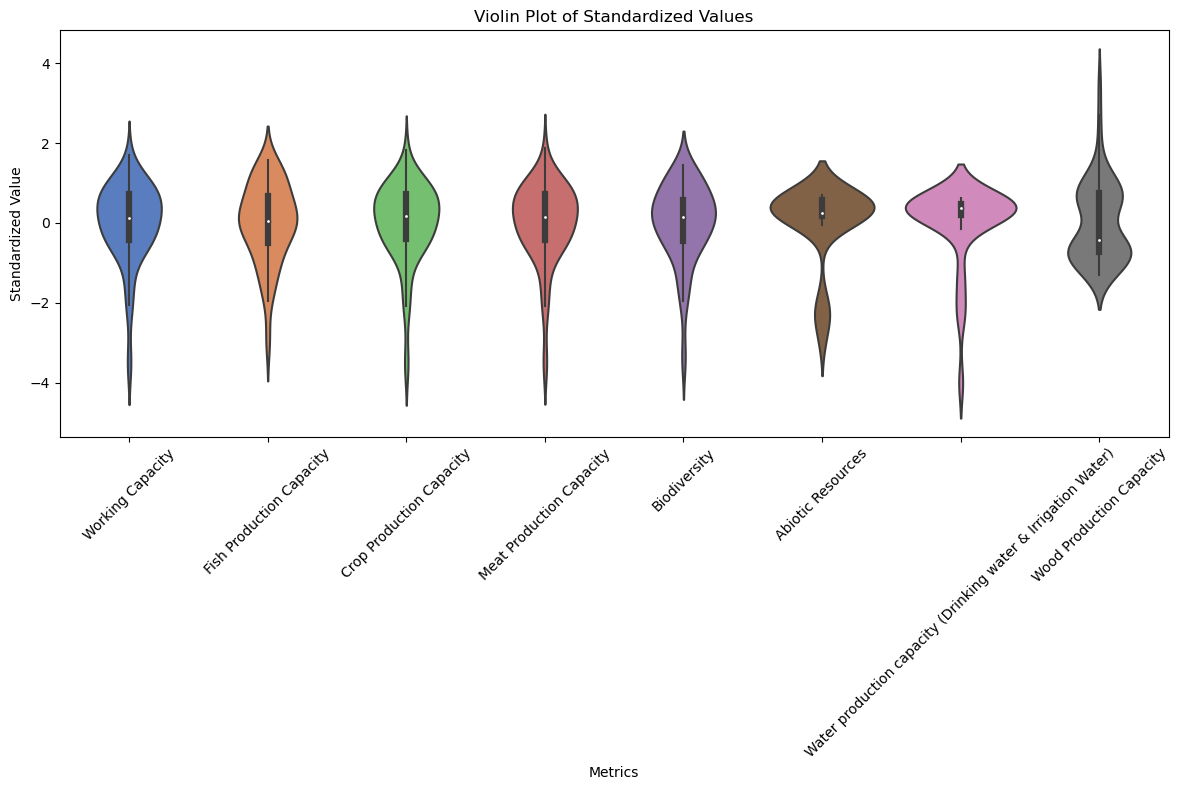

In [21]:
df_opinc_box['std_value'] = df_opinc_box.groupby('variable')['value'].transform(lambda x: (x - x.mean()) / x.std())

# Create the violin plot with standardized values
plt.figure(figsize=(12, 8))
sns.violinplot(x='variable', y='std_value', data=df_opinc_box, palette="muted")
plt.xlabel('Metrics')
plt.ylabel('Standardized Value')
plt.title('Violin Plot of Standardized Values')
plt.xticks(rotation=45)  # Rotate x labels for better readability if they are lengthy
plt.tight_layout()  # Ensures that all labels fit well in the plot area
plt.show()

## On Percentage of Total Environmental Cost

In [22]:
df_cost = filtered_df.copy()
for column in df_cost.loc[:,"Working Capacity":"SDG 15.5"]:
    #print(column)
    df_cost[column] = (df_cost[column] / df_cost['Total Environmental Cost']) * 100
df_cost.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Revenue,Operating Income,Total Environmental Cost,Working Capacity,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
517,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.065962,-0.465228,1.057940e+10,1.500000e+09,-6.978419e+08,42.287318,...,57.000663,0.011116,0.000160,0.000047,0.005306,0.000190,-0.002175,-0.002175,0.001757,0.059202
523,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Brewers,-0.033887,-0.114930,5.248464e+10,1.547524e+10,-1.778566e+09,87.777779,...,10.734160,0.012511,0.000220,0.000018,0.010726,0.000262,-0.003186,-0.003186,0.003647,0.080199
526,2019,CARLSBERG A/S,DENMARK,Brewers,-0.024146,-0.160548,9.890572e+09,1.487489e+09,-2.388141e+08,82.159411,...,16.341914,0.153535,0.000620,0.000121,0.011704,0.000739,-0.008062,-0.008011,0.003412,0.029599
530,2019,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-0.018988,-0.124194,2.687117e+10,4.108276e+09,-5.102237e+08,84.852395,...,13.689242,0.038844,0.000286,0.000033,0.010687,0.000341,-0.004049,-0.004049,0.003538,0.093336
532,2019,HEINEKEN NV,NETHERLANDS,Brewers,-0.017098,-0.105084,2.687117e+10,4.372284e+09,-4.594560e+08,94.295450,...,4.083923,0.043136,0.000317,0.000037,0.011876,0.000378,-0.004496,-0.004496,0.003932,0.101854


In [23]:
df_melted = df_cost.melt(id_vars='GICS Sub-Industry', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_melted

,GICS Sub-Industry,variable,value
0,Brewers,Working Capacity,42.287318
1,Brewers,Working Capacity,87.777779
2,Brewers,Working Capacity,82.159411
3,Brewers,Working Capacity,84.852395
4,Brewers,Working Capacity,94.295450
...,...,...,...
555,Brewers,Wood Production Capacity,-0.010158
556,Brewers,Wood Production Capacity,-0.011510
557,Brewers,Wood Production Capacity,-0.035799
558,Brewers,Wood Production Capacity,-0.002879


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


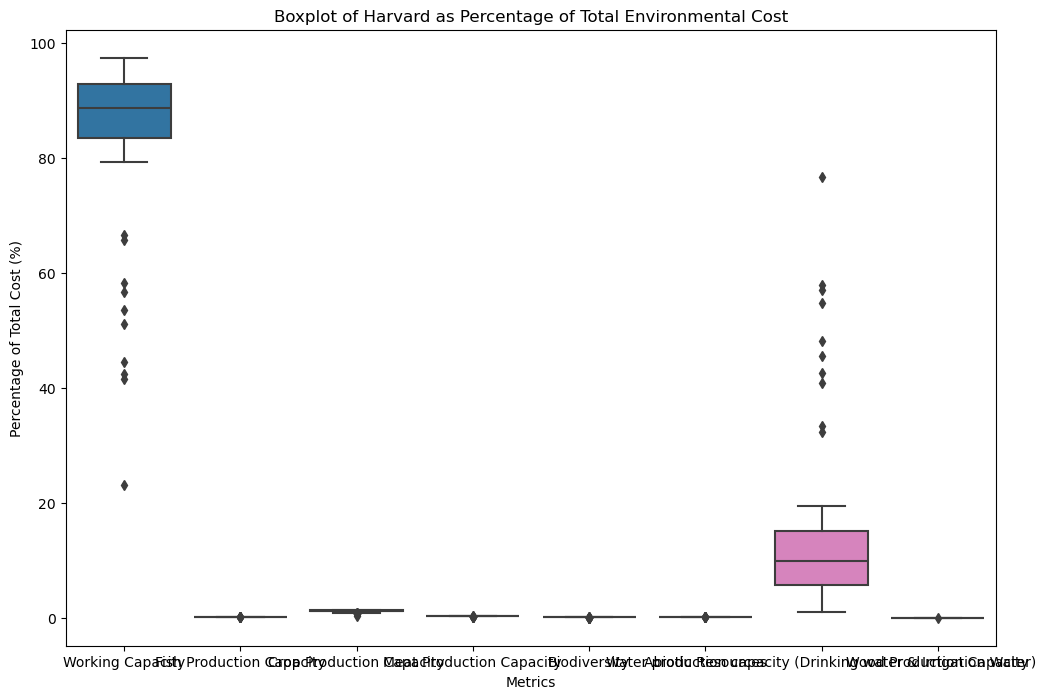

In [24]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Total Cost (%)')
plt.title('Boxplot of Harvard as Percentage of Total Environmental Cost')
plt.show()

## On the most important SDGs

In [25]:
df_opinc_box = df_opinc.melt(id_vars='GICS Sub-Industry', value_vars=df_opinc.loc[:,"SDG 1.5":"SDG 6"])
df_opinc_box

,GICS Sub-Industry,variable,value
0,Brewers,SDG 1.5,-8.748568
1,Brewers,SDG 1.5,-4.501238
2,Brewers,SDG 1.5,-5.842610
3,Brewers,SDG 1.5,-4.716872
4,Brewers,SDG 1.5,-4.435221
...,...,...,...
625,Brewers,SDG 6,-4.551475
626,Brewers,SDG 6,-1.790711
627,Brewers,SDG 6,-2.518710
628,Brewers,SDG 6,-0.914156


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


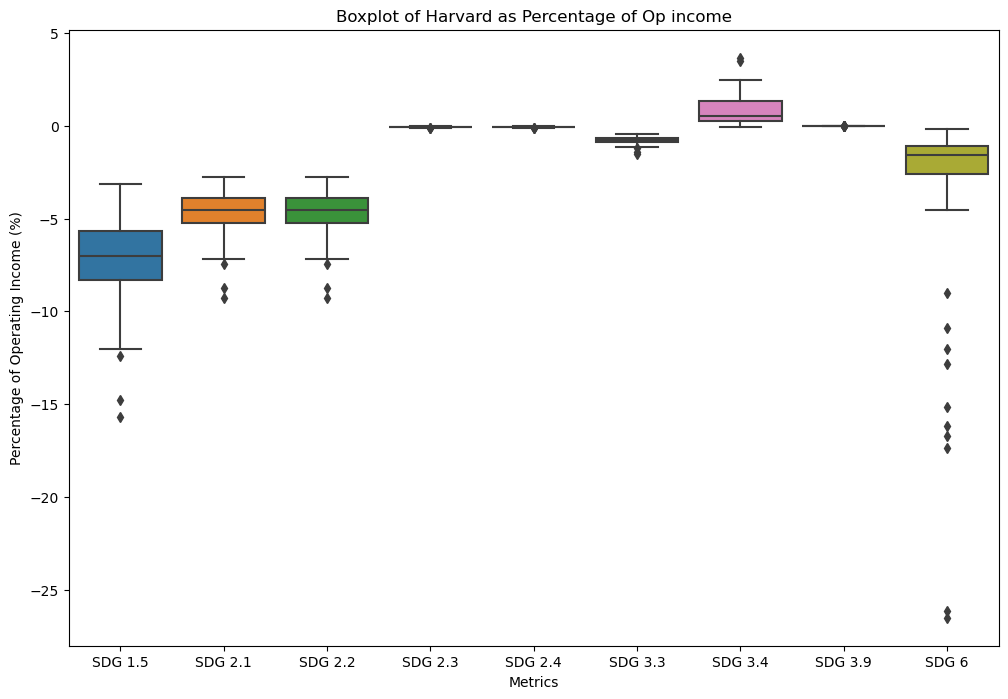

In [26]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_opinc_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Operating Income (%)')
plt.title('Boxplot of Harvard as Percentage of Op income')
plt.show()

# Find Molson Ranking in the Industry when looking at SDGs (See excel)